[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/develop/examples/clustering/k-means.ipynb)

In [1]:
!pip install "sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@develop"

zsh:1: command not found: pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sorix.clustering import Kmeans

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


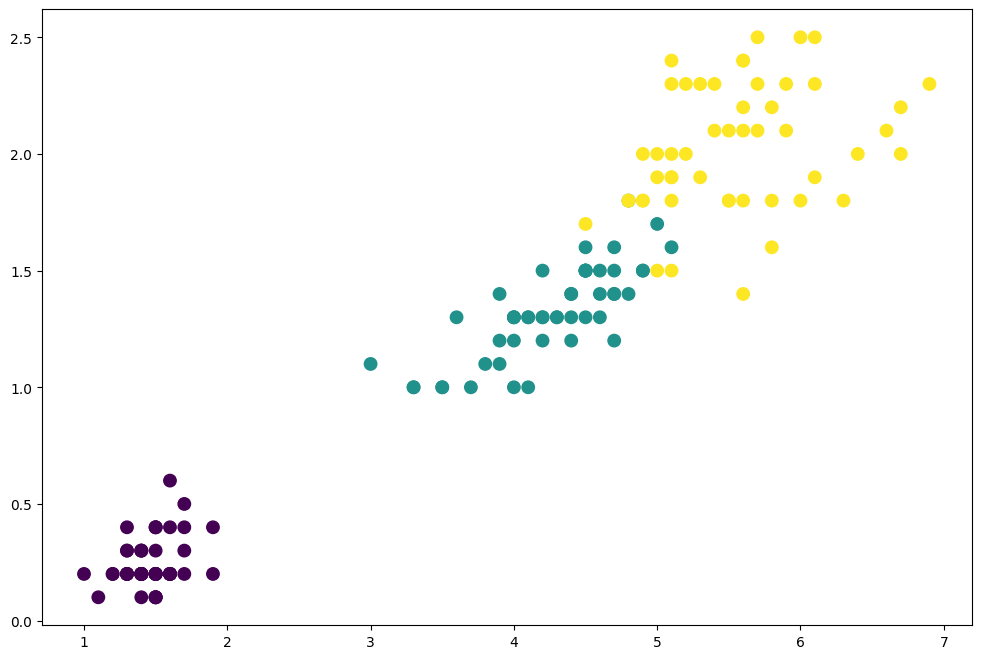

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [6]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [7]:
model= Kmeans(n_centroids=3)
model.fit(X)

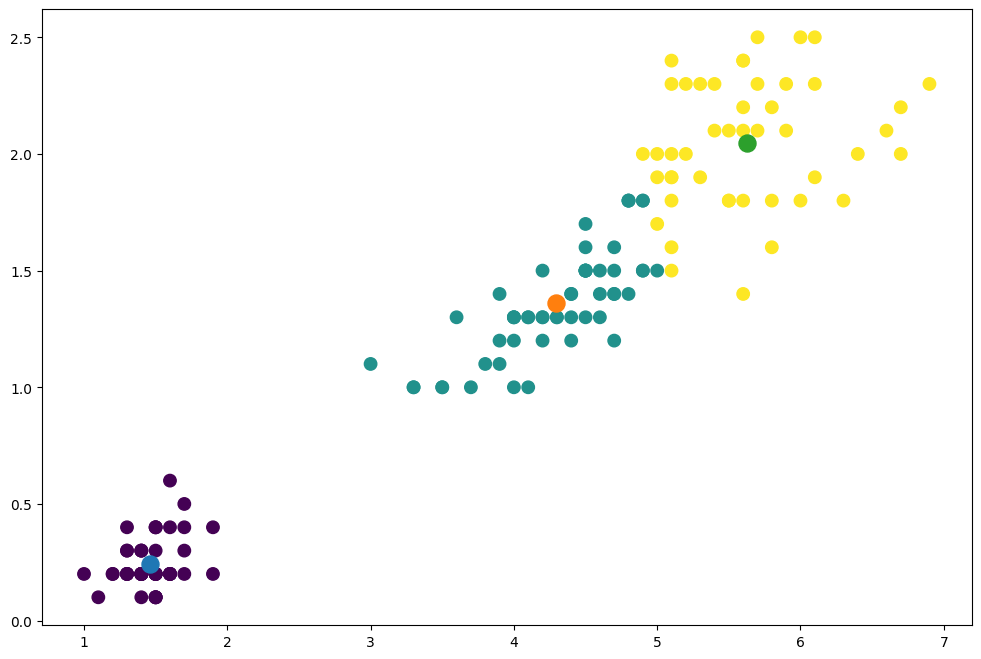

In [8]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

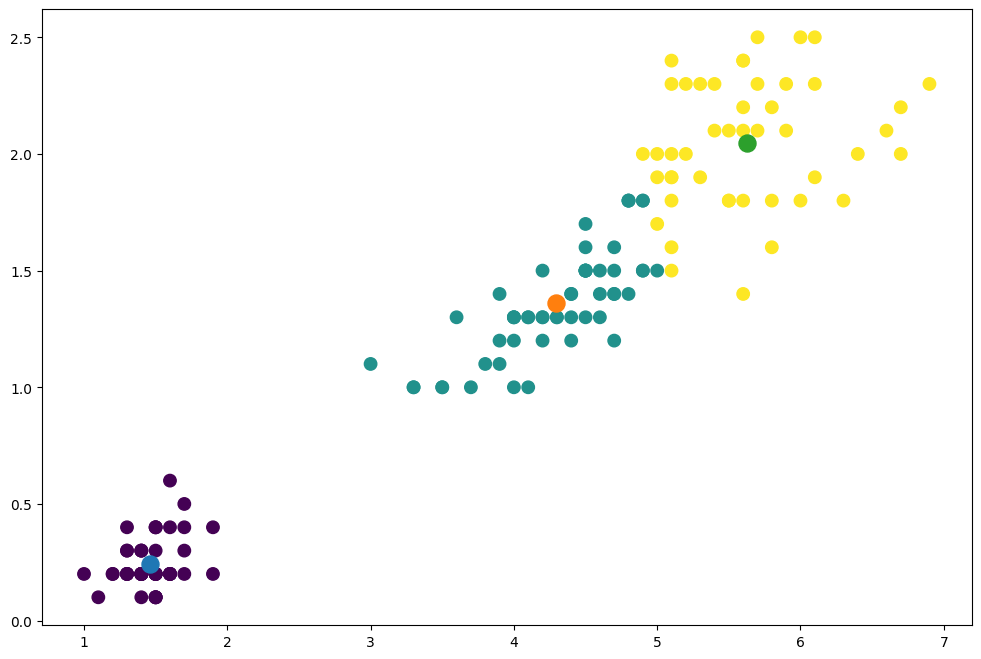

In [9]:
pred_labels = model.predict(X)
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [10]:
model.get_distances(X)

array([[1.20640000e-02, 1.94219479e+01, 4.25485444e+01],
       [1.20640000e-02, 1.94219479e+01, 4.25485444e+01],
       [5.76640000e-02, 2.05989849e+01, 4.42589792e+01],
       [6.46400000e-03, 1.82849108e+01, 4.08781096e+01],
       [1.20640000e-02, 1.94219479e+01, 4.25485444e+01],
       [1.60064000e-01, 1.52834294e+01, 3.62589792e+01],
       [1.44640000e-02, 1.89782442e+01, 4.18294140e+01],
       [6.46400000e-03, 1.82849108e+01, 4.08781096e+01],
       [1.20640000e-02, 1.94219479e+01, 4.25485444e+01],
       [4.40640000e-02, 1.87686145e+01, 4.16372401e+01],
       [6.46400000e-03, 1.82849108e+01, 4.08781096e+01],
       [4.08640000e-02, 1.71878738e+01, 3.92476749e+01],
       [4.96640000e-02, 1.99056516e+01, 4.33076749e+01],
       [3.06464000e-01, 2.35567627e+01, 4.85589792e+01],
       [1.43264000e-01, 2.18160219e+01, 4.60094140e+01],
       [5.12640000e-02, 1.74375034e+01, 3.94798488e+01],
       [1.02464000e-01, 1.97515775e+01, 4.28607183e+01],
       [1.44640000e-02, 1.89782

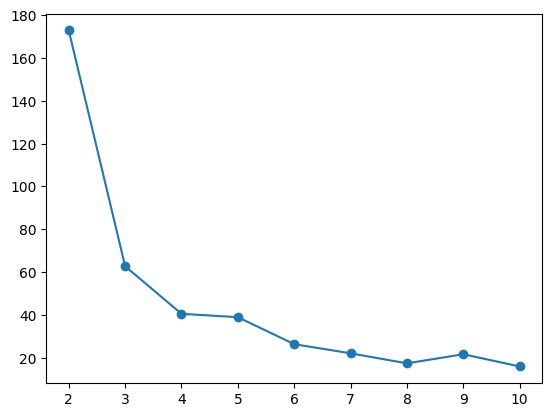

In [11]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.fit(X)
    inertias.append(model.get_inertia(X))

import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')